# Task1: Comparing historical performance of accounts with inflation rates

File list we will use:
* InvestorAccountHistory.xlsx (to get account return values)
* InflationRate.xlsx ( to calculate inflation rate)


## Part1: Understand the problem

**Objective**

We would like to see performance of account against inflation rate starts from the day money is funded and till money is withdrawn.

To reach our objective, we will calculate inflation rate cumulatively. After we calculate it we will inspect rates for every specific account respectively.

* We only care about inflation rate of accounts date interval, for example if account started fund it's money on 2016-01 and withdrawn on 2019-01 we only care about inflation rate between this two date


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
# Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Let's fetch the inflation data first
inflation = pd.read_excel("./Project/data/InflationRates.xlsx", index_col="DateMonth")
inflation

,InfReturnMonthly
DateMonth,
2014-01,-1.3
2014-02,0.0
2014-03,0.2
2014-04,0.9
2014-05,0.0
...,...
2020-07,-0.9
2020-08,0.0
2020-09,0.2


In [4]:
inflation.head()

,InfReturnMonthly
DateMonth,
2014-01,-1.3
2014-02,0.0
2014-03,0.2
2014-04,0.9
2014-05,0.0


In [5]:
inflation.tail()

,InfReturnMonthly
DateMonth,
2020-07,-0.9
2020-08,0.0
2020-09,0.2
2020-10,0.5
2020-11,0.2


In [6]:
#Basic statistic on data
inflation.describe()

,InfReturnMonthly
count,83.000000
mean,0.032530
std,0.617846
min,-1.900000
25%,-0.300000
50%,0.100000
75%,0.500000
max,1.100000


In [7]:
# We will calculate inflation rates cumulatively, in order to do that we must divide every CPI value by 100. 
# In this section we're just preparing the data, we're not calculating real inflation rates now.
inflation["InfReturnMonthly"] = inflation.InfReturnMonthly / 100
inflation

,InfReturnMonthly
DateMonth,
2014-01,-0.013
2014-02,0.000
2014-03,0.002
2014-04,0.009
2014-05,0.000
...,...
2020-07,-0.009
2020-08,0.000
2020-09,0.002


## Part 1.1: See inflation rate between years

Some of the account has 2016 initial date some of them 2017,2018 and so on... In order to see their performance let's plot inflation between certain years

* This part is only for practice.

### Inflation between 2017-2018

In [8]:
# Fetch CPI value between 2016-01 and 2017
inflation_1718 = inflation.loc["2017-01":"2018-01"]
# Calculate inflation rate cumulatively for 2017 and 2018
inflation_1718["Inflation"] = ((1 + inflation_1718.InfReturnMonthly).cumprod() - 1) * 100
inflation_1718

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,InfReturnMonthly,Inflation
DateMonth,,
2017-01,-0.005,-0.500000
2017-02,-0.004,-0.898000
2017-03,0.000,-0.898000
2017-04,0.010,0.093020
2017-05,-0.001,-0.007073
2017-06,0.000,-0.007073
2017-07,-0.007,-0.707024
2017-08,0.002,-0.508438
2017-09,0.002,-0.309454


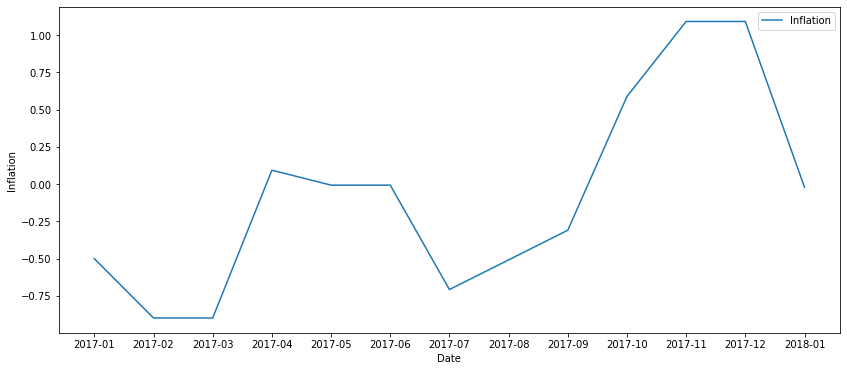

In [9]:
plt.figure(figsize=(14,6))
sns.lineplot(data=inflation_1718.Inflation, label="Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.show()

### Inflation between 2018-2019

In [10]:
inflation_1819 = inflation.loc["2018-01":"2019-01"]
# Calculate inflation cumulatively for 2018 and 2019
inflation_1819["Inflation"] = ((1 + inflation_1819.InfReturnMonthly).cumprod() - 1) * 100
inflation_1819

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InfReturnMonthly,Inflation
DateMonth,,
2018-01,-0.011,-1.100000
2018-02,0.001,-1.001100
2018-03,0.001,-0.902101
2018-04,0.008,-0.109318
2018-05,0.009,0.789698
2018-06,0.003,1.092067
2018-07,-0.007,0.384423
2018-08,0.001,0.484807
2018-09,0.002,0.685777


<Figure size 432x288 with 0 Axes>

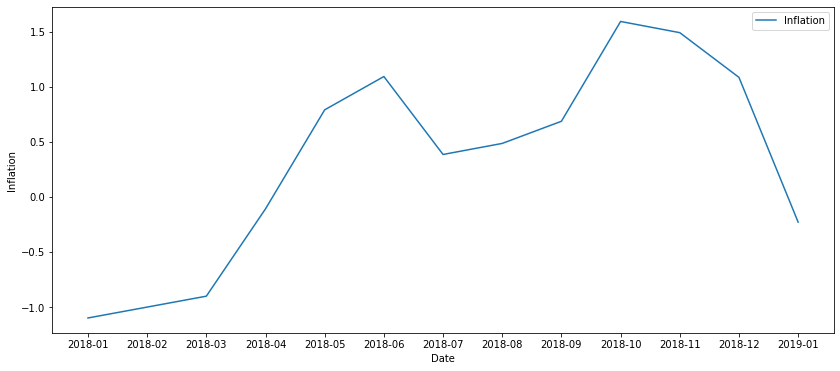

In [11]:
plt.clf() # clear figure
plt.figure(figsize=(14,6))
sns.lineplot(data=inflation_1819.Inflation, label="Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.show()

### Inflation between 2019-2020

In [12]:
inflation_1920 = inflation.loc["2019-01":"2020-01"]
# Calculate inflation cumulatively for 2019 and 2020
inflation_1920["Inflation"] = ((1 + inflation_1920.InfReturnMonthly).cumprod() - 1) * 100
inflation_1920

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InfReturnMonthly,Inflation
DateMonth,,
2019-01,-0.013,-1.300000
2019-02,0.002,-1.102600
2019-03,0.004,-0.707010
2019-04,0.010,0.285919
2019-05,0.002,0.486491
2019-06,-0.001,0.386005
2019-07,-0.006,-0.216311
2019-08,-0.001,-0.316095
2019-09,0.000,-0.316095


<Figure size 432x288 with 0 Axes>

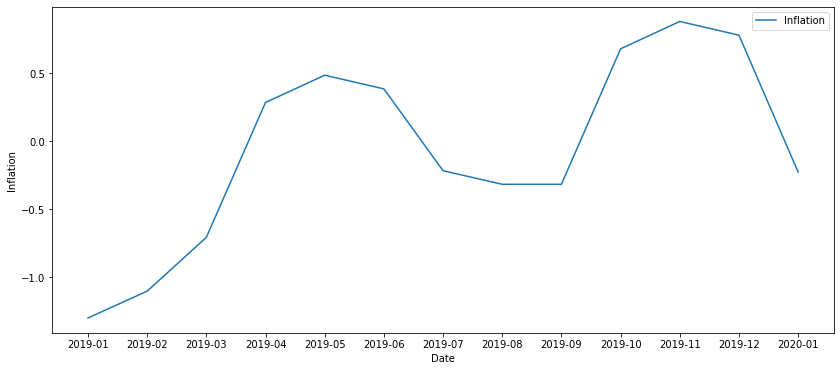

In [13]:
plt.clf() # clear figure
plt.figure(figsize=(14,6))
sns.lineplot(data=inflation_1920.Inflation, label="Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.show()

## Part2: Performance of random 3 account

- In order to see performance of 3 account against the inflation rate, we will fetch 3 random account from InvestorAccountHistory.xlsx file. After we will calculate CPI cumulatively according to their date interval.

For example:

accountId=1 initial fund date: 2016-01 , withdrawn date: 2019-11 we will calculate inflation between those days.

In [14]:
# Let's fetch first n=3900 row.
account_performance = pd.read_excel("./Project/data/InvestorAccountHistory.xlsx", nrows=3900, index_col="AccountId")
account_performance

,Date,AccountValue,Return
AccountId,,,
1,2016-01-07,5000.00,0.00
1,2016-01-08,10000.00,0.00
1,2016-01-11,9940.47,-0.60
1,2016-01-12,9963.85,-0.36
1,2016-01-13,9931.80,-0.68
...,...,...,...
7,2016-03-04,10186.43,1.86
7,2016-03-07,10184.21,1.84
7,2016-03-08,10126.00,1.26


In [15]:
# We can frop accountvalue column we only interest about return and date columnb
account_performance = account_performance.drop(["AccountValue"],axis=1)
account_performance

,Date,Return
AccountId,,
1,2016-01-07,0.00
1,2016-01-08,0.00
1,2016-01-11,-0.60
1,2016-01-12,-0.36
1,2016-01-13,-0.68
...,...,...
7,2016-03-04,1.86
7,2016-03-07,1.84
7,2016-03-08,1.26


In [16]:
# Our inflation rate data is monhly based. So we need to some job in here
# We have to convert our daily basis data to monthly basis. And when we do it we will fetch 
# Last return value of that month.For example accountId=1 performed -0.42 return on 2016-01.

account_performance = account_performance.groupby(['AccountId', account_performance['Date'].dt.strftime('%Y-%m')])['Return'].last().reset_index()

In [17]:
account_performance = account_performance.set_index("AccountId")

In [18]:
# random 5 sample
account_performance.sample(5)

,Date,Return
AccountId,,
3,2018-11,15.738999
1,2018-04,19.566187
7,2016-03,0.380000
3,2017-04,16.610000
3,2016-10,6.960000


In [19]:
# Let's seperate our dataframe to 3 different account
account1=account_performance.loc[1]
account2=account_performance.loc[4]
account3=account_performance.loc[5]

In [20]:
# Let's add specific CPI values belong to date of account's
account1["Inflation"] = inflation.InfReturnMonthly[account1["Date"]].values
account2["Inflation"] = inflation.InfReturnMonthly[account2["Date"]].values
account3["Inflation"] = inflation.InfReturnMonthly[account3["Date"]].values

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [21]:
account1

,Date,Return,Inflation
AccountId,,,
1,2016-01,-0.420000,-0.019
1,2016-02,0.190000,-0.004
1,2016-03,0.950000,0.006
1,2016-04,1.040000,0.007
1,2016-05,3.340000,0.005
1,2016-06,3.420000,0.005
1,2016-07,6.760000,-0.007
1,2016-08,6.680000,0.001
1,2016-09,6.950000,0.000


In [53]:
# Calculate cumulative inflation for each account
account1["Inflation"] = ((1 + account1.Inflation).cumprod() - 1 ) * 100
account2["Inflation"] = ((1 + account2.Inflation).cumprod() - 1 ) * 100
account3["Inflation"] = ((1 + account3.Inflation).cumprod() - 1 ) * 100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [54]:
account1.head()

,Date,Return,Inflation
AccountId,,,
1,2016-01,-0.42,-1.900000
1,2016-02,0.19,-2.292400
1,2016-03,0.95,-1.706154
1,2016-04,1.04,-1.018097
1,2016-05,3.34,-0.523188


In [55]:
account2.head()

,Date,Return,Inflation
AccountId,,,
4,2016-02,0.00,-0.400000
4,2016-03,-0.48,0.197600
4,2016-04,-0.29,0.898983
4,2016-05,2.39,1.403478
4,2016-06,2.10,1.910496


In [56]:
account3.head()

,Date,Return,Inflation
AccountId,,,
5,2016-02,0.00,-0.400000
5,2016-03,-0.23,0.197600
5,2016-04,-0.21,0.898983
5,2016-05,1.91,1.403478
5,2016-06,2.09,1.910496


### Plotting the performance of 3 account

Plotting will help us to understand performance of accounts against the inflation rate 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


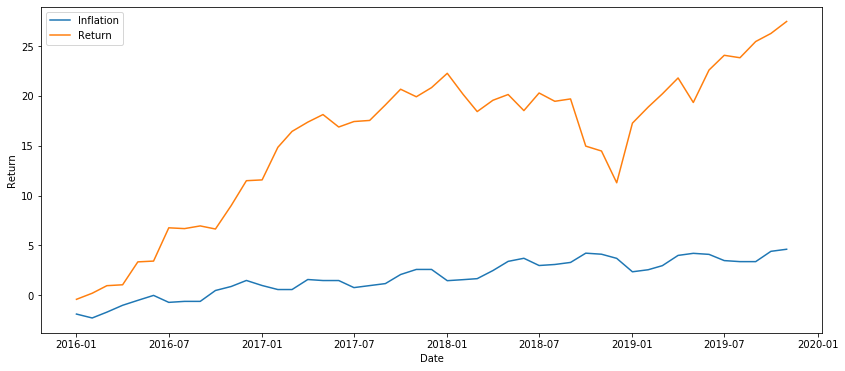

In [57]:
# We need to convert our str Date to datetime objects, otherwise x axis of plot would be messed up
account1['Date'] = pd.to_datetime(account1['Date'], format = '%Y-%m')
# Adjust figure size of plot
plt.figure(figsize=(14,6))
# Passing x and y axis to the lineplot
sns.lineplot(data=account1, x=account1.Date,y="Inflation",label="Inflation")
sns.lineplot(data=account1, x=account1.Date,y="Return",label="Return")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


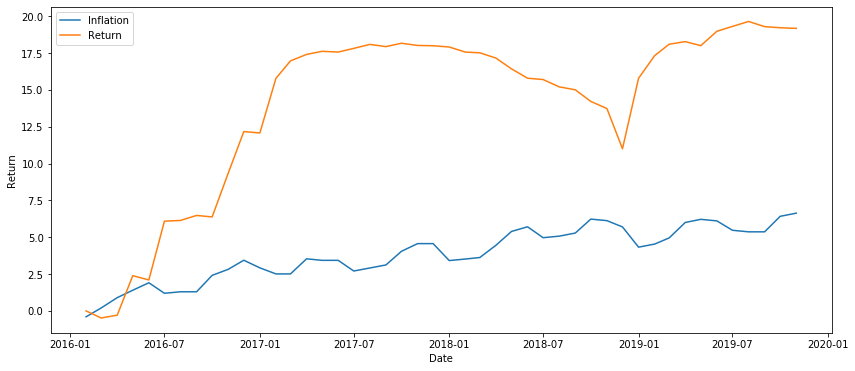

In [58]:
account2['Date'] = pd.to_datetime(account2['Date'], format = '%Y-%m')
# Adjust figure size of plot
plt.figure(figsize=(14,6))
# Passing x and y axis to the lineplot
sns.lineplot(data=account2, x=account2.Date,y="Inflation",label="Inflation")
sns.lineplot(data=account2, x=account2.Date,y="Return",label="Return")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


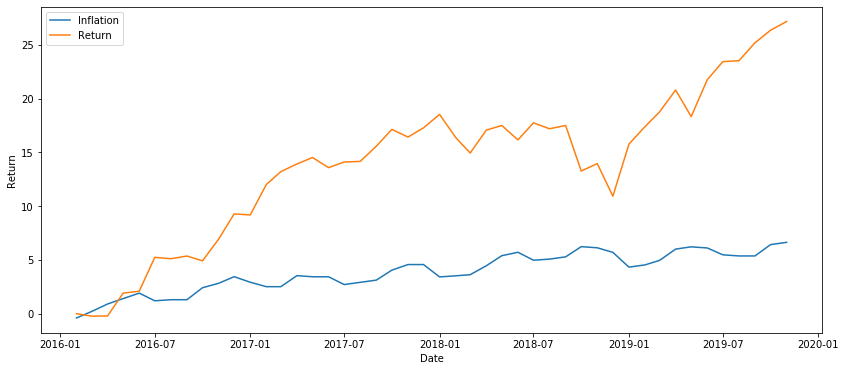

In [59]:
account3['Date'] = pd.to_datetime(account3['Date'], format = '%Y-%m')
# Adjust figure size of plot
plt.figure(figsize=(14,6))
# Passing x and y axis to the lineplot
sns.lineplot(data=account3, x=account3.Date,y="Inflation",label="Inflation")
sns.lineplot(data=account3, x=account3.Date,y="Return",label="Return")
plt.show()

## Part 3: Reaching the objective

Our objective was to see how many accounts in total performed better than inflation rates in terms of total return.

**How can we approach the solution? Here is the list of things we will do to reach our objective**

* Fetch all account's data from InvestorAccountHistory.xlsx
* Turn daily basis data to monthly basis data, because our inflation rates are monthly based
* Calculate inflation rate cumulatively for each account individually. Because each accounts date interval is different, some of them is been to system for example between 2016-2019 some of them between 2018-2019, therefore inflation affect them differently.
* To see how many account performed better than inflation, we will create a new column called "Success", if account's return > inflation success is 1, otherwise 0.

In [60]:
# Let's fetch the data

df = pd.read_excel("./Project/data/InvestorAccountHistory.xlsx", index_col="AccountId")
df

,Date,AccountValue,Return
AccountId,,,
1,2016-01-07,5000.00,0.00
1,2016-01-08,10000.00,0.00
1,2016-01-11,9940.47,-0.60
1,2016-01-12,9963.85,-0.36
1,2016-01-13,9931.80,-0.68
...,...,...,...
7138,2019-11-01,5000.00,0.00
7139,2019-10-31,5000.00,0.00
7139,2019-11-01,5000.00,0.00


In [61]:
# Is there any null value?
df.isnull().sum()

Date            2
AccountValue    2
Return          2
dtype: int64

In [62]:
# Delete last two row
df.drop(df.tail(2).index,inplace=True)

In [63]:
df.tail()

,Date,AccountValue,Return
AccountId,,,
7136,2019-11-01,10000.0,0.0
7138,2019-10-31,5000.0,0.0
7138,2019-11-01,5000.0,0.0
7139,2019-10-31,5000.0,0.0
7139,2019-11-01,5000.0,0.0


In [64]:
# Drop AccountValue column, we don't interest with it
df = df.drop(["AccountValue"],axis=1)
df

,Date,Return
AccountId,,
1,2016-01-07,0.00
1,2016-01-08,0.00
1,2016-01-11,-0.60
1,2016-01-12,-0.36
1,2016-01-13,-0.68
...,...,...
7136,2019-11-01,0.00
7138,2019-10-31,0.00
7138,2019-11-01,0.00


In [65]:
# Let's convert our daily basis data to monthly basis
df = df.groupby(['AccountId', df['Date'].dt.strftime('%Y-%m')])['Return'].last().reset_index().set_index("AccountId")

In [66]:
df

,Date,Return
AccountId,,
1,2016-01,-0.42
1,2016-02,0.19
1,2016-03,0.95
1,2016-04,1.04
1,2016-05,3.34
...,...,...
7136,2019-11,0.00
7138,2019-10,0.00
7138,2019-11,0.00


In [67]:
# Adding monthly inflation rates to our dataframe, for example for accountId=1 how was the inflation rate at 2016-01?

df["Inflation"] = inflation["InfReturnMonthly"][df["Date"]].values

In [68]:
df

,Date,Return,Inflation
AccountId,,,
1,2016-01,-0.42,-0.019
1,2016-02,0.19,-0.004
1,2016-03,0.95,0.006
1,2016-04,1.04,0.007
1,2016-05,3.34,0.005
...,...,...,...
7136,2019-11,0.00,0.002
7138,2019-10,0.00,0.010
7138,2019-11,0.00,0.002


In [69]:
# Calculate inflation rate cumulatively in terms of date interval of accounts
# We use the lambda function to apply cumulative production
df["Inflation"] = df.groupby(["AccountId"]).Inflation.apply(lambda x: (x + 1).cumprod()-1) * 100

In [70]:
# Let's see 3 different account their inflation rate
# Inflation rate must be different because inflation affects each account differently.

df.loc[1]
df.loc[17]
df.loc[5]

,Date,Return,Inflation
AccountId,,,
5,2016-02,0.000000,-0.400000
5,2016-03,-0.230000,0.197600
5,2016-04,-0.210000,0.898983
5,2016-05,1.910000,1.403478
5,2016-06,2.090000,1.910496
5,2016-07,5.240000,1.197122
5,2016-08,5.110000,1.298319
5,2016-09,5.360000,1.298319
5,2016-10,4.910000,2.412601


As you can see every account has own inflation rate according to their time interval

### Take last month and last return value of account

**We only interest last return value of account, therefore we will convert our dataframe according to last return and last date of accounts**

In [71]:
df = df.groupby(["AccountId"])["Date","Return","Inflation"].last().reset_index().set_index("AccountId")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [72]:
# Every account has different inflation rate because inflation affect them in terms of their date interval
df[:30]

,Date,Return,Inflation
AccountId,,,
1,2019-11,27.476871,4.607676
3,2019-11,27.333140,4.293853
4,2019-11,19.178523,6.633716
5,2019-11,27.170163,6.633716
7,2019-11,26.574040,4.607676
9,2019-11,24.259259,5.267015
10,2019-11,22.799868,5.157849
12,2019-04,-100.000346,4.016313
13,2019-11,14.811175,4.597516


## Final

We will create new column according to success of account.

* If account's Return value > Inflation Rate , account is successful (1)

* If account's Return value < Inflation Rate , account is not successful (0)

In [73]:
# We use numpy to make a conditional comparision
df["Success"] = np.where(df["Return"]>df["Inflation"],1,0)

In [74]:
# We have 635 account, how many of them are successful?
df

,Date,Return,Inflation,Success
AccountId,,,,
1,2019-11,27.476871,4.607676,1
3,2019-11,27.333140,4.293853,1
4,2019-11,19.178523,6.633716,1
5,2019-11,27.170163,6.633716,1
7,2019-11,26.574040,4.607676,1
...,...,...,...,...
7127,2019-11,-0.090103,1.202000,0
7131,2019-11,0.000000,1.202000,0
7136,2019-11,0.000000,1.202000,0


In [75]:
df.loc[df["Success"]==1].shape

(490, 4)

In [76]:
print(49000/635)

77.16535433070867


## Result: %77.16 of accounts are successful against inflation rates

After prepare our data

* We looked inflation between certain years, they were important examples to understand better inflation between years
* We choosed random 3 investor sample and examined their performance against inflation

After plotting and seeing performance of investors, we took a step into all investors. Important part of our problem was calculating inflation cumulatively for each account. What does that mean? Every investor get affecting by inflation from different date interval, for example if one investor has been to system for two years and other one has been to only one year, the rate of inflation they've got affected would be different from each other.

* Thats why we calculated inflation for each investor respectively
* As a result we calculated success of investors

references:

https://money.stackexchange.com/questions/134064/how-to-calculate-monthly-inflation-from-cpi/134069#134069

https://stackoverflow.com/questions/65417889/converting-daily-data-to-monthly-and-get-months-last-value-in-pandas?noredirect=1#comment115657397_65417889

https://www.kaggle.com/alexisbcook/line-charts